In [1]:
import math
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
bg = '#11134A'
accent = '#202289'
txt = '#FAF9F1'
azzurro = '#6FCED9'
blu = '#7F8DDD'

mpl.rcParams['text.color'] = txt
mpl.rcParams['axes.labelcolor'] = txt
mpl.rcParams['xtick.color'] = txt
mpl.rcParams['ytick.color'] = txt
mpl.rcParams['axes.facecolor'] = bg
mpl.rcParams['axes.edgecolor'] = txt

In [3]:
social = pd.read_csv( '../../data/servizi-sociali.csv' )

In [4]:
users = social[ social['Tipo dato'] == 'utenti sulla popolazione di riferimento del servizio' ]
users_ass = users[ users['Servizio o intervento'] == 'assistenza domiciliare socio-assistenziale' ]
users_ass = users_ass[['Area di utenza', 'Time', 'Value']]
users_ass['pop'] = 100
users_ass = users_ass.groupby('Area di utenza')
# users_vou = users[ users['Servizio o intervento'] == 'voucher, assegno di cura, buono socio-sanitario' ]

In [5]:
cities = social[ social['Tipo dato'] == 'comuni che offrono il servizio sul totale comuni' ]
cities_ass = cities[ cities['Servizio o intervento'] == 'assistenza domiciliare socio-assistenziale' ]
cities_ass = cities_ass[['Area di utenza', 'Time', 'Value']]
cities_ass = cities_ass.groupby('Area di utenza')
# cities_vou = cities[ cities['Servizio o intervento'] == 'voucher, assegno di cura, buono socio-sanitario' ]

In [6]:
print(cities_ass.head(2))

                             Area di utenza  Time  Value
0                                  disabili  2011   94.4
1                                  disabili  2012   55.6
9                   anziani (65 anni e più)  2011  100.0
10                  anziani (65 anni e più)  2012  100.0
18                        famiglia e minori  2011   11.1
19                        famiglia e minori  2012    5.6
135  povertà, disagio adulti e senza dimora  2011   16.7
136  povertà, disagio adulti e senza dimora  2012    0.0


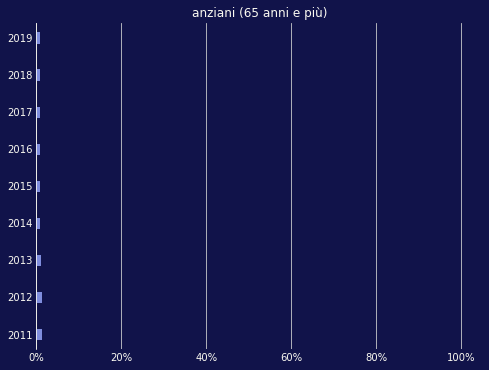

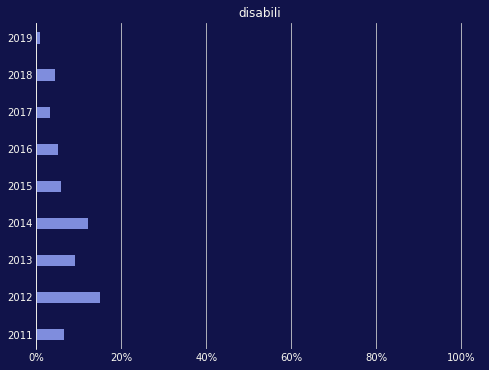

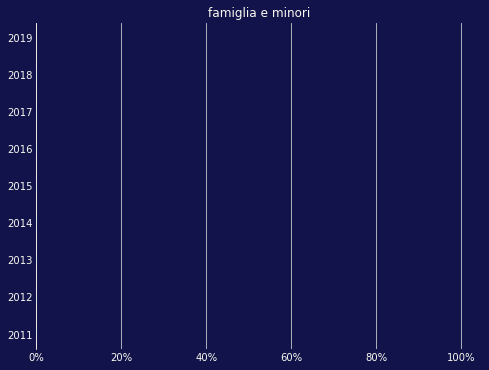

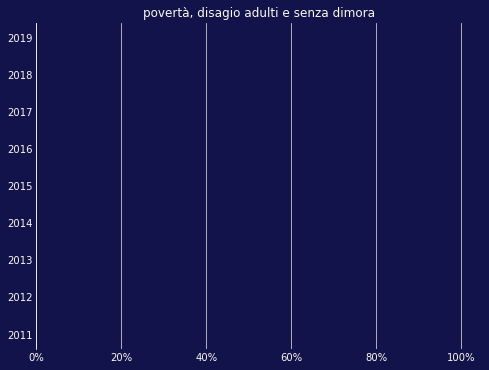

In [9]:
for name, group in users_ass:
    fig, ax = plt.subplots( figsize = (8, 6))
    barwidth = 0.30
    group.plot.barh( ax = ax, 
                      x = 'Time', 
                      y = 'pop', 
                      color = bg, 
                      legend = None, 
                      alpha = 0.0
                     )
    group.plot.barh( ax = ax, 
                      x = 'Time', 
                      y = 'Value', 
                      color = blu, 
                      width = barwidth, 
                      legend = None
                     )
    plt.title(name)
    
    plt.ylabel('')
#     ax.spines['left'].set_ec('gray')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_axisbelow(True)
    ax.xaxis.grid( color = 'lightgray' )
    ax.xaxis.set_major_formatter(mtick.PercentFormatter())
    ax.tick_params(axis = u'both', 
                   which = u'both',
                   length = 0
                  )
    
#     filename = 'users-' + name + '.jpg'
    fig.patch.set_facecolor(bg)

360° = 6.28319 radians
14.9 : 100 = x : 6.28319
x = 14.9 * 6.28319 / 100

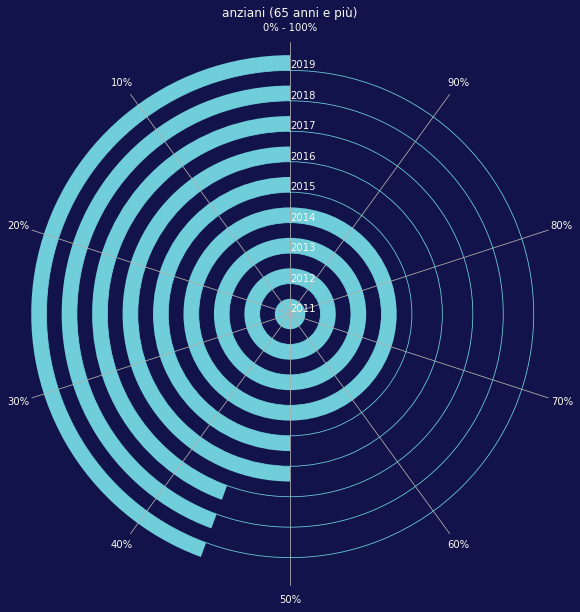

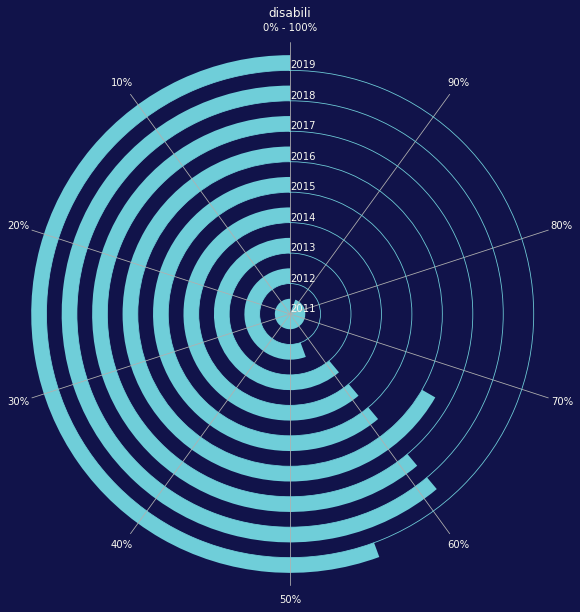

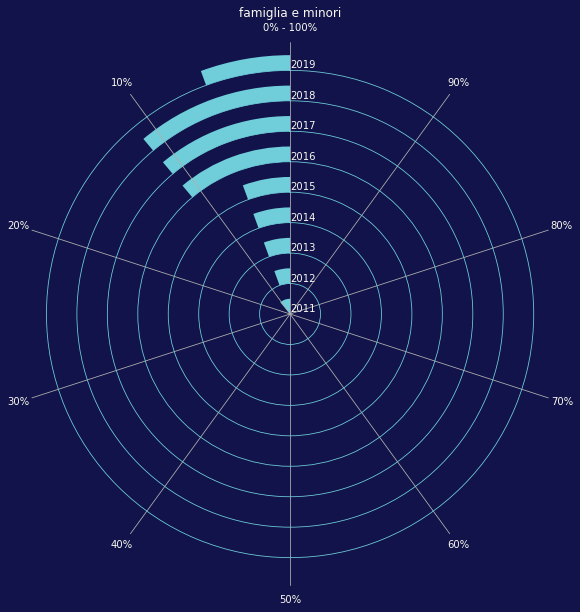

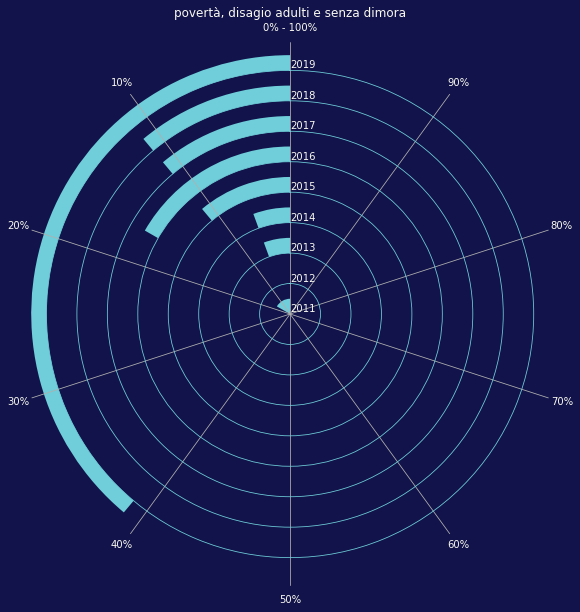

In [8]:
for name, group in cities_ass:
    fig, ax = plt.subplots( figsize = (10, 10) )
    ax = plt.subplot( projection = 'polar' )
    ax.set_theta_zero_location('N')
    ax.set_xticklabels([])
    
    ax.set_rlabel_position(0)
    ax.set_thetagrids([0, 36, 72, 108, 144, 180, 216, 252, 288, 324], 
                      labels = ['0% - 100%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%']
                     )
    ax.set_rgrids([0, 1, 2, 3, 4, 5, 6, 7, 8], 
                  labels = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
                 )
    ax.yaxis.grid( color = azzurro )
    ax.set_frame_on(False)
    
    i = 0
    j = 0.5
    for num in group.Value.array:
        ax.barh(i, 
                num * 6.28319 / 100, 
                color = azzurro, 
                height = j,
                capstyle = 'round', 
                align='edge'
               )
        i+= 1
    plt.title(name)
    
#     filename = 'cities-' + name + '.jpg'
    fig.patch.set_facecolor(bg)